#Interpolación de Lagrange para Dibujar un pato
##Presentado por David Molano y Dorian Moreno
####Problema
Se pide por medio del método de interpolación de Lagrange dibujar la silueta de un pato, intentando utilizar como entrada del algoritmo la menor cantidad de puntos posibles, para lograr una buen aproximacion a la silueta de este.
####Solución
Se utilizará la interpolación de Lagrange modificada baricentrica para aproximar la silueta del pato.
####Forma Modificada y Baricentrica de Lagrange
Está formula se trata de una optimizacion de la formula típica de Langrange, que acelera el calculo computacional del polinimio interpolante, ademas de que es en terminos numericos mas estable. Ademas, dada la situacion que se ha planteado como problema, esta forma es mas ideal pues se ajusta mejor cuando se utiliza para  interpolar una función en todo un intervalo con un con un polinomio interpolante.
Sea
$$\iota(x)=(x-x_{0})(x-x_{1})...(x-x_{n})$$
se definen los pesos baricentricos como
$${\omega_{k}=\prod\cfrac{1}{x_{k}-x_{i}},k=0,1,...,n,0\leq i\leq n}$$
definiendo el polinomio interpolante como
$${P_{n}(x)=\imath(x)\sum\cfrac{\omega_{i}}{x-x_{i}}y_{i},0\leq i\leq n}$$

Dada la definicion formal vista, se plantea el algoritmo que obtiene dicho polinomio. Para poder realizar una correcta aproximaicon de la silueta del pato, se van interpolando intervalo de puntos seguidos que van dibujando la silueta a trozos para finalmente construir toda la figura.
A continuacion se muestra la implementacion del algoritmo junto con la salida que produce el pato en lenguaje R.

[1] "(((3.25/(x-0.9))+(-6.25/(x-1.3))+ (3.08333333333333/(x-1.9)))/((2.5/(x-0.9))+(-4.16666666666667/(x-1.3))+(1.66666666666667/(x-1.9))))"
[1] "(((-0.27679693578311/(x-1.9))+(0.747489503111691/(x-2.1))+(-1.57470395565634/(x-2.6))+(1.59154570919277/(x-3))+(-1.29500129500129/(x-3.9))+(1.64864657618281/(x-4.4))+(-1.09552367955729/(x-4.7))+ (0.245783755238705/(x-5)))/((-0.149619965288168/(x-1.9))+(0.355947382434139/(x-2.1))+(-0.605655367560129/(x-2.6))+(0.589461373775099/(x-3))+(-0.539583872917206/(x-3.9))+(0.766812361015259/(x-4.4))+(-0.534401794905997/(x-4.7))+(0.117039883447003/(x-5))))"
[1] "(((-0.000364394303788243/(x-5))+(0.00263224393530997/(x-6))+(-0.00755058894593779/(x-7))+(0.0105218855218855/(x-8))+(-0.00838798271833986/(x-9.2))+(0.00565091474182383/(x-10.5))+(-0.00376888736444933/(x-11.3))+ (0.00144404445568258/(x-11.6)))/((-0.000173521097042021/(x-5))+(0.0011698861934711/(x-6))+(-0.00328286475910339/(x-7))+(0.00467639356528246/(x-8))+(-0.00430152959914865/(x-9.2))+(0.00403636

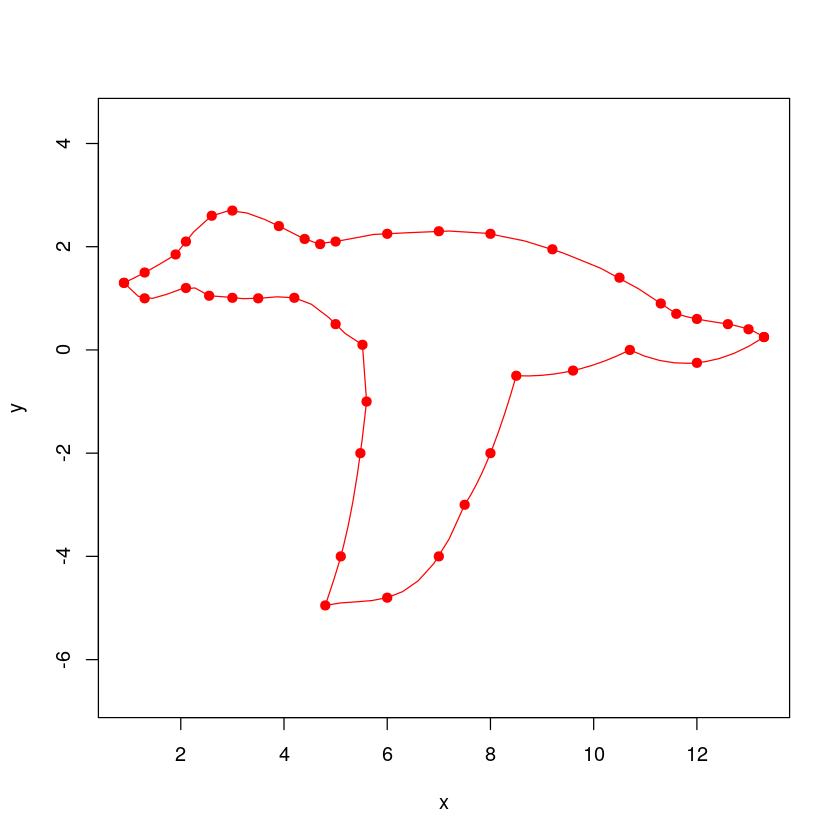

In [1]:
#install.packages("graphics")
#library(graphics)
#Dorian René Moreno y David Molano

x=c(0.9, 1.3, 1.9, 2.1, 2.6, 3, 3.9, 4.4, 4.7, 5, 6, 7, 8, 9.2, 10.5, 11.3, 11.6, 12, 12.6, 13, 13.3, 0.9, 1.3, 2.1, 2.55, 3, 3.5, 4.2, 5, 5.52, 5.6, 5.48, 5.1, 4.8, 6, 7, 7.5, 8, 8.5, 9.6, 10.7, 12, 13.3)                                                                                                       
y=c(1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25, 1.3, 1, 1.2, 1.05, 1.01, 1, 1.01, 0.5, 0.1, -1, -2, -4, -4.95, -4.8,-4, -3, -2, -0.5, -0.4, 0, -0.25, 0.25)      

as.function <- function(formula) {
  function(x) eval(expr = parse(text=formula), list(x))
}

evaluar<-function(eq, xi, yi, x){
  f <- as.function(eq)
  n <- length(xi)
  m <- length(x)
  if ( min(x) < min(xi) || max(x) > max(xi) )
    stop("Algunos nodos a interpolar están por fuera")
  y = vector()
  for(i in 1:m){
    ban = TRUE
    for(j in 1:n){
      if(x[i]==xi[j]){
        ban = FALSE
        y = c(y, yi[match(x[i], xi)])
      }
    }
    if(ban){
      y = c(y, f(x[i]))
    }
  }
  return(y)
}

lagrange<-function(x, y, sc, ini, fin, cant){
  ws <- vector()
  wi <- vector()
  for(i in ini:fin){
    temp = 1.0
    for(j in ini:fin){
      if(x[i]!=x[j]){
        temp = temp *(x[i]-x[j])
      }
    }
    temp = 1.0/temp
    wi = c(wi, temp)
    temp = temp*y[i]
    ws = c(ws, temp)
  }
  sup = "(("
  inf = "/("
  for(i in ini:(fin-1)){
    act = paste("(", paste(ws[i-ini+1], paste("/(x-", paste(x[i], "))+", collapse = "", sep = ""), collapse = "", sep = ""), collapse = "", sep = ""), collapse = "", sep = "")
    sup = paste(sup, act, collapse = "", sep = "")
    act = paste("(", paste(wi[i-ini+1], paste("/(x-", paste(x[i], "))+", collapse = "", sep = ""), collapse = "", sep = ""), collapse = "", sep = ""), collapse = "", sep = "")
    inf = paste(inf, act, collapse = "", sep = "")
  }
  act = paste("(", paste(ws[fin-ini+1], paste("/(x-", paste(x[fin], ")))", collapse = "", sep = ""), collapse = "", sep = ""), collapse = "", sep = ""), collapse = "", sep = "")
  sup = paste(sup, act, collapse = "")
  act = paste("(", paste(wi[fin-ini+1], paste("/(x-", paste(x[fin], "))))", collapse = "", sep = ""), collapse = "", sep = ""), collapse = "", sep = ""), collapse = "", sep = "")
  inf = paste(inf, act, collapse = "", sep = "")
  lin = paste(sup, inf, collapse = "/", sep = "")
  print(lin)
  x0 <- seq(from = min(x[ini], x[fin]),to = max(x[fin], x[ini]), len=(cant))
  x0 <- sort(unique(x0))
  y0 <- evaluar(lin, x[ini:fin], y[ini:fin], x0)
  sc<- sc + lines(x0, y0, col="red")
}

sc<-plot(x,y, pch=19, cex=1, col = "red", asp=1)
lagrange(x, y, sc, 1, 3, 10)
lagrange(x, y, sc, 3, 10, 10)
lagrange(x, y, sc, 10, 17, 10)
lagrange(x, y, sc, 17, 21, 10)
lagrange(x, y, sc, 22, 25, 7)
lagrange(x, y, sc, 25, 30, 10)
lagrange(x, y, sc, 30, 31, 10)
lagrange(x, y, sc, 31, 34, 10)
lagrange(x, y, sc, 34, 37, 10)
lagrange(x, y, sc, 37, 39, 10)
lagrange(x, y, sc, 39, 41, 10)
lagrange(x, y, sc, 41, 43, 10)

En la anterior ejecucion de codigo se observa los polinomios que se fueron interpolando con los intervalos de puntos, para ir trazando la funcion a trozos. Luego se observa la silueta del pato con una muy buena aproximacion. Este resultado se debe a que el metodo baricentrico de Lagrange es numericamente mas estable; lo que en terminos practicos de la solucion al problema quiere decir que ofrece un polinomio interpolado que suaviza la curva que una los puntos de un intervalo dado, logrando asi una silueta bastate mejor que con el metodo clasico de Lagrange.